In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import math

In [40]:
df = pd.read_csv('./Dataset/train.csv')
df

,Id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,12.58,9.875,9.20,NaN,NaN,NaN,NaN,NaN,0.690,...,NaN,NaN,NaN,4.80,5.850,NaN,NaN,NaN,NaN,NaN
1,3,9.37,10.300,10.75,NaN,NaN,NaN,NaN,NaN,0.710,...,NaN,NaN,NaN,5.88,6.835,NaN,NaN,NaN,NaN,NaN
2,4,8.35,8.290,7.90,NaN,NaN,NaN,NaN,NaN,2.210,...,NaN,NaN,NaN,3.20,2.700,NaN,NaN,NaN,NaN,NaN
3,5,9.57,8.820,6.80,NaN,NaN,NaN,NaN,NaN,0.595,...,NaN,NaN,NaN,7.70,7.055,NaN,NaN,NaN,NaN,NaN
4,6,6.00,6.000,6.50,NaN,NaN,NaN,NaN,NaN,0.600,...,NaN,NaN,NaN,5.50,5.300,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,208,6.80,7.700,7.50,NaN,NaN,NaN,NaN,NaN,0.380,...,NaN,NaN,NaN,5.00,5.800,NaN,NaN,NaN,NaN,NaN
143,211,5.30,6.300,5.65,NaN,NaN,NaN,NaN,NaN,0.370,...,NaN,NaN,NaN,8.00,8.000,NaN,NaN,NaN,NaN,NaN
144,212,8.60,8.600,11.00,NaN,NaN,NaN,NaN,NaN,2.400,...,NaN,NaN,NaN,6.80,7.200,NaN,NaN,NaN,NaN,NaN
145,213,9.90,9.600,14.10,NaN,NaN,NaN,NaN,NaN,0.310,...,NaN,NaN,NaN,5.20,7.800,NaN,NaN,NaN,NaN,NaN


In [42]:
df.drop(['Id'],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  147 non-null    float64
 1   O2_1    145 non-null    float64
 2   O2_2    145 non-null    float64
 3   O2_3    32 non-null     float64
 4   O2_4    31 non-null     float64
 5   O2_5    33 non-null     float64
 6   O2_6    37 non-null     float64
 7   O2_7    37 non-null     float64
 8   NH4_1   145 non-null    float64
 9   NH4_2   145 non-null    float64
 10  NH4_3   32 non-null     float64
 11  NH4_4   31 non-null     float64
 12  NH4_5   33 non-null     float64
 13  NH4_6   37 non-null     float64
 14  NH4_7   37 non-null     float64
 15  NO2_1   145 non-null    float64
 16  NO2_2   145 non-null    float64
 17  NO2_3   32 non-null     float64
 18  NO2_4   31 non-null     float64
 19  NO2_5   33 non-null     float64
 20  NO2_6   37 non-null     float64
 21  NO2_7   37 non-null     float64
 22  NO

In [46]:
df.isnull().sum()

target      0
O2_1        2
O2_2        2
O2_3      115
O2_4      116
O2_5      114
O2_6      110
O2_7      110
NH4_1       2
NH4_2       2
NH4_3     115
NH4_4     116
NH4_5     114
NH4_6     110
NH4_7     110
NO2_1       2
NO2_2       2
NO2_3     115
NO2_4     116
NO2_5     114
NO2_6     110
NO2_7     110
NO3_1       2
NO3_2       2
NO3_3     115
NO3_4     116
NO3_5     114
NO3_6     110
NO3_7     110
BOD5_1      2
BOD5_2      2
BOD5_3    115
BOD5_4    116
BOD5_5    114
BOD5_6    110
BOD5_7    110
dtype: int64

In [48]:
dropable = list(df.columns[df.isna().sum()>100])
dropable

['O2_3',
 'O2_4',
 'O2_5',
 'O2_6',
 'O2_7',
 'NH4_3',
 'NH4_4',
 'NH4_5',
 'NH4_6',
 'NH4_7',
 'NO2_3',
 'NO2_4',
 'NO2_5',
 'NO2_6',
 'NO2_7',
 'NO3_3',
 'NO3_4',
 'NO3_5',
 'NO3_6',
 'NO3_7',
 'BOD5_3',
 'BOD5_4',
 'BOD5_5',
 'BOD5_6',
 'BOD5_7']

In [50]:
df.drop(dropable,axis=1,inplace=True)
df

,target,O2_1,O2_2,NH4_1,NH4_2,NO2_1,NO2_2,NO3_1,NO3_2,BOD5_1,BOD5_2
0,12.58,9.875,9.20,0.690,1.040,0.0940,0.0990,1.58,1.825,4.80,5.850
1,9.37,10.300,10.75,0.710,0.725,0.0585,0.0515,1.21,0.905,5.88,6.835
2,8.35,8.290,7.90,2.210,2.210,0.1000,0.1100,1.34,1.250,3.20,2.700
3,9.57,8.820,6.80,0.595,0.675,0.0460,0.0535,0.59,0.790,7.70,7.055
4,6.00,6.000,6.50,0.600,0.900,0.1800,0.3400,1.36,1.820,5.50,5.300
...,...,...,...,...,...,...,...,...,...,...,...
142,6.80,7.700,7.50,0.380,1.900,0.6200,0.0640,2.80,3.330,5.00,5.800
143,5.30,6.300,5.65,0.370,0.500,0.6900,0.9500,4.37,3.160,8.00,8.000
144,8.60,8.600,11.00,2.400,3.600,0.1500,0.1400,0.53,3.000,6.80,7.200
145,9.90,9.600,14.10,0.310,0.500,0.2100,0.0800,3.10,3.500,5.20,7.800


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  147 non-null    float64
 1   O2_1    145 non-null    float64
 2   O2_2    145 non-null    float64
 3   NH4_1   145 non-null    float64
 4   NH4_2   145 non-null    float64
 5   NO2_1   145 non-null    float64
 6   NO2_2   145 non-null    float64
 7   NO3_1   145 non-null    float64
 8   NO3_2   145 non-null    float64
 9   BOD5_1  145 non-null    float64
 10  BOD5_2  145 non-null    float64
dtypes: float64(11)
memory usage: 12.8 KB


In [54]:
(df.isna().sum(axis=0)!=0).sum()

10

In [56]:
(df.isna().sum(axis=1)!=0).sum()

3

In [58]:
df.dropna(axis=0,inplace=True)
df

,target,O2_1,O2_2,NH4_1,NH4_2,NO2_1,NO2_2,NO3_1,NO3_2,BOD5_1,BOD5_2
0,12.58,9.875,9.20,0.690,1.040,0.0940,0.0990,1.58,1.825,4.80,5.850
1,9.37,10.300,10.75,0.710,0.725,0.0585,0.0515,1.21,0.905,5.88,6.835
2,8.35,8.290,7.90,2.210,2.210,0.1000,0.1100,1.34,1.250,3.20,2.700
3,9.57,8.820,6.80,0.595,0.675,0.0460,0.0535,0.59,0.790,7.70,7.055
4,6.00,6.000,6.50,0.600,0.900,0.1800,0.3400,1.36,1.820,5.50,5.300
...,...,...,...,...,...,...,...,...,...,...,...
142,6.80,7.700,7.50,0.380,1.900,0.6200,0.0640,2.80,3.330,5.00,5.800
143,5.30,6.300,5.65,0.370,0.500,0.6900,0.9500,4.37,3.160,8.00,8.000
144,8.60,8.600,11.00,2.400,3.600,0.1500,0.1400,0.53,3.000,6.80,7.200
145,9.90,9.600,14.10,0.310,0.500,0.2100,0.0800,3.10,3.500,5.20,7.800


In [60]:
X = df.drop(['target'],axis=1)
y = df['target']

In [64]:
X

,O2_1,O2_2,NH4_1,NH4_2,NO2_1,NO2_2,NO3_1,NO3_2,BOD5_1,BOD5_2
0,9.875,9.20,0.690,1.040,0.0940,0.0990,1.58,1.825,4.80,5.850
1,10.300,10.75,0.710,0.725,0.0585,0.0515,1.21,0.905,5.88,6.835
2,8.290,7.90,2.210,2.210,0.1000,0.1100,1.34,1.250,3.20,2.700
3,8.820,6.80,0.595,0.675,0.0460,0.0535,0.59,0.790,7.70,7.055
4,6.000,6.50,0.600,0.900,0.1800,0.3400,1.36,1.820,5.50,5.300
...,...,...,...,...,...,...,...,...,...,...
142,7.700,7.50,0.380,1.900,0.6200,0.0640,2.80,3.330,5.00,5.800
143,6.300,5.65,0.370,0.500,0.6900,0.9500,4.37,3.160,8.00,8.000
144,8.600,11.00,2.400,3.600,0.1500,0.1400,0.53,3.000,6.80,7.200
145,9.600,14.10,0.310,0.500,0.2100,0.0800,3.10,3.500,5.20,7.800


In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [89]:
test = pd.read_csv('./Dataset/test.csv')
test

,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,1,10.90,10.60,NaN,NaN,NaN,NaN,NaN,0.63,0.600,...,NaN,NaN,NaN,6.800,5.40,NaN,NaN,NaN,NaN,NaN
1,2,13.15,12.62,NaN,NaN,NaN,NaN,NaN,1.50,0.870,...,NaN,NaN,NaN,4.710,4.20,NaN,NaN,NaN,NaN,NaN
2,32,3.80,6.50,NaN,NaN,NaN,NaN,NaN,0.32,0.540,...,NaN,NaN,NaN,2.100,3.40,NaN,NaN,NaN,NaN,NaN
3,40,10.45,10.65,NaN,NaN,NaN,NaN,NaN,1.38,1.635,...,NaN,NaN,NaN,5.350,5.85,NaN,NaN,NaN,NaN,NaN
4,43,8.10,8.10,NaN,NaN,NaN,NaN,NaN,1.72,1.680,...,NaN,NaN,NaN,4.800,5.30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,206,4.14,7.60,8.11,2.09,0.6,12.76,0.463,0.37,0.260,...,1.43,0.872,1.22,5.800,6.60,1.75,5.3,15.1,4.6,15.6
59,209,9.90,8.20,NaN,NaN,NaN,NaN,NaN,0.39,0.325,...,NaN,NaN,NaN,3.685,4.85,NaN,NaN,NaN,NaN,NaN
60,210,8.00,9.50,NaN,NaN,NaN,NaN,NaN,0.43,0.210,...,NaN,NaN,NaN,7.500,4.80,NaN,NaN,NaN,NaN,NaN
61,215,4.10,4.30,NaN,NaN,NaN,NaN,NaN,0.36,0.420,...,NaN,NaN,NaN,8.000,6.80,NaN,NaN,NaN,NaN,NaN


<BarContainer object of 10 artists>

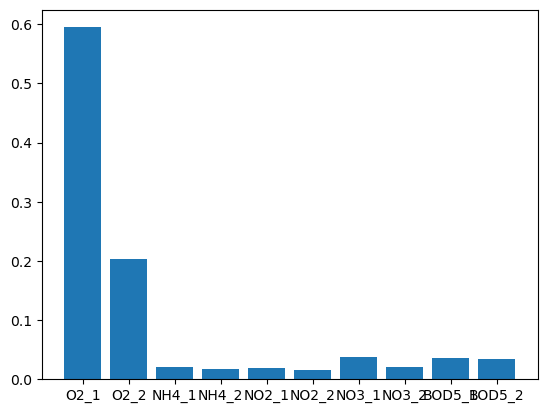

In [81]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)
plt.bar(X.columns,rf.feature_importances_)

In [91]:
pred = rf.predict(X_test)
print("R2 score : ",r2_score(y_test,pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,pred)))

R2 score :  0.9640080133321288
RMSE :  0.3914451052887842
